In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\ianme\OneDrive\Desktop\Spyder\Stock Sentiment Analysis\SMSSpamCollection\UpdatedResumeDataSet.csv")

In [4]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


## Exploring Categories

In [6]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

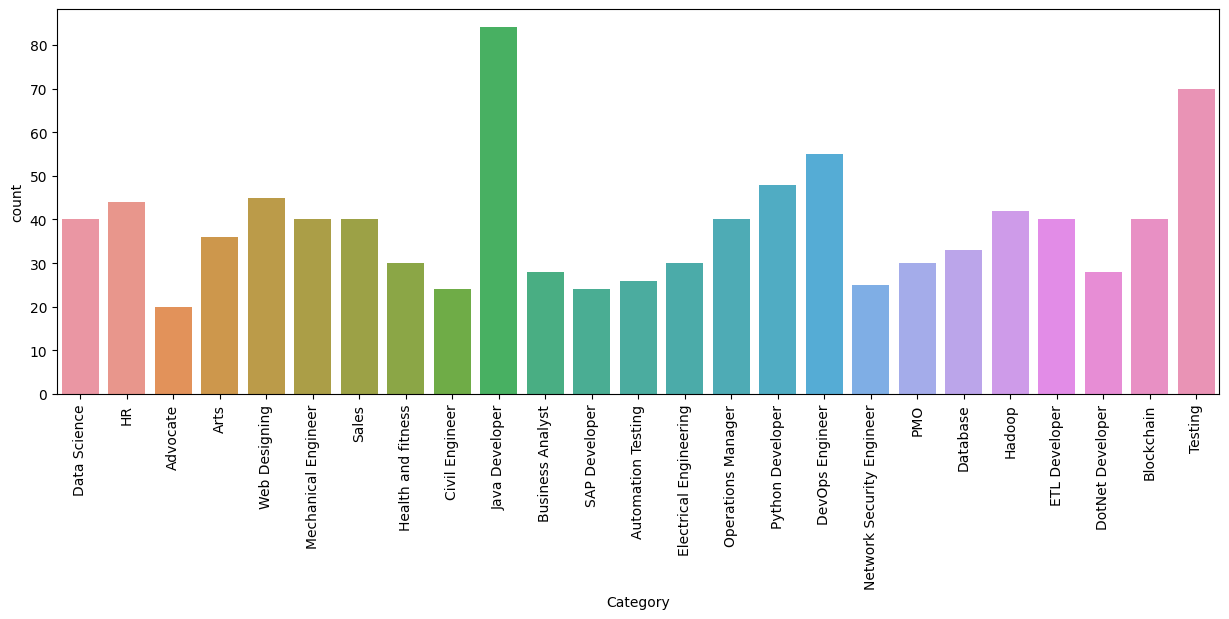

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Category')
plt.xticks(rotation=90)
plt.show()

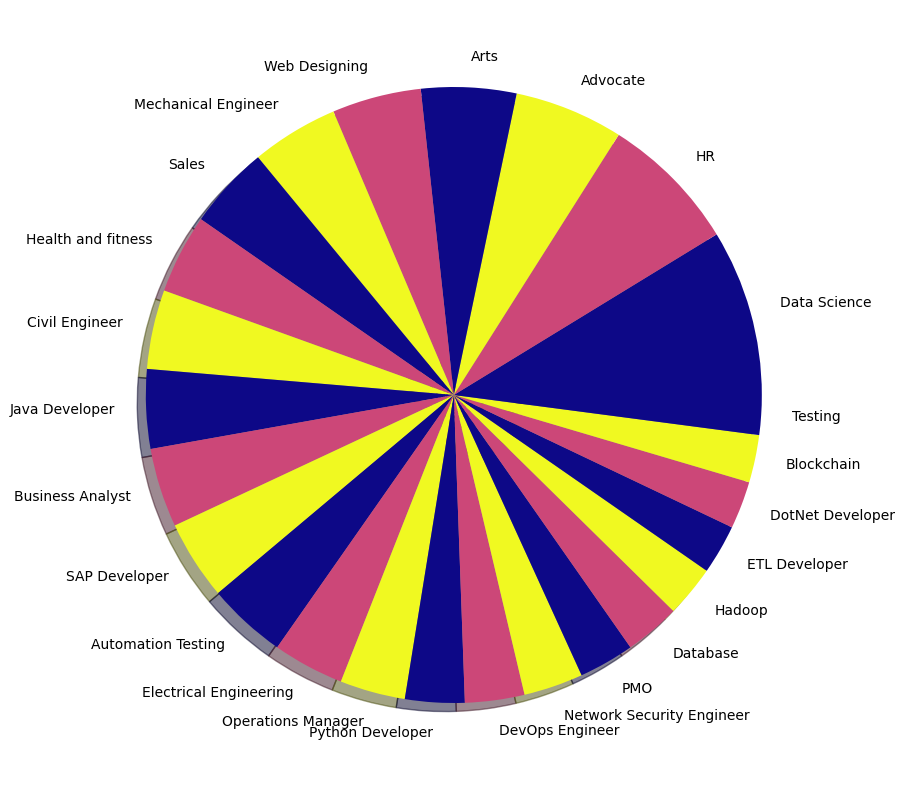

In [20]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

## Exploring Resume

In [25]:
df['Category'][10]

'Data Science'

In [24]:

df['Resume'][10]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

## Cleaning Data:

In [26]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [27]:
cleanResume("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and a ess it '

In [28]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [32]:
df['Resume'][10]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

##  categorical values

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [35]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [36]:

# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

## Vactorization

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredTaxt  = tfidf.transform(df['Resume'])

## data splitting for training and testing

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['Category'], test_size=0.2, random_state=42)

In [41]:
X_train.shape

(769, 7351)

## training and testing

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


In [44]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [45]:
myresume = """Ian Franson Mendonca
 Reutlingen ianmendonca1996@gmail.com +4915753622022
 www.linkedin.com/in/imianmendonca
 EDUCATION
 https://github.com/Ianmendonca
 University of Siegen, M.Sc Mechatronics
 Machine Learning, Deep Learning
 Final grade : 1.7(Current GPA)
 PES Institute of Technology, 
Bachelor of Mechanical Engineering
 MASTER THESIS
 Oct 2021 – present | Siegen, Germany
 Aug 2014 – May 2018
 Bengaluru, India
 Digitalization and optimization of process parameters in 
the production of Power electronics, 
Bosch Reutlingen(Current)
 Jan 2024 – present
 I am developing ML algorithms to optimize process parameters and create a digital twin for power
 electronics production, to meet the demands of electric vehicle production. Tasks include :
 Preparation, analysis, processing, and management of data from various sources.
 •
 •
 Optimization, validation, and hyperparameter tuning of deep neural networks for continuous
 process improvement.
 •
 Present research findings to stakeholders and the management.
 Skills: Python, Tensorflow, Scikit-Learn, MLflow, Bayesian Optimization, Optuna library, Power
 BI, Functional API, Gradient & Gradient Free optimization.
 PROFESSIONAL EXPERIENCE
 Bharat Fritz Werner, Product Engineer
 Responsible for the design and development of CNC machines.
 •
 •
 Jul 2021 – Aug 2024 | Bengaluru, India
 Prepared work instructions, assisted assembly personnel, and handled complaints from 
customers and vendors.
 •
 Conducted market and feasibility studies for the development of a new product.
 •
 Attended marketing team review meetings to handle special orders and develop new customers.
 •
 Assistance to production staff in implementing new CNC products in the assembly line. 
•
 Digitalization & Optimization of sale order releases and packing list creation, increasing the 
efficiency of design engineers and assembly personnel by 25%.
 Products: BMV80, Swift Nx5
 Skills: Product Management, Market Analysis, CAD, Training
 Research Assistant
 Optimization of an Embedded and Real-Time Pupil Detection Pipeline
 •
 Jul 2023 – Nov 2023
 Proposed a new pipeline utilizing various image processing techniques (blurring, filtering, 
thresholding) to enhance the performance of the existing model for pupil detection.
 •
 Optimized the hyperparameters and implemented the algorithm using the OpenCV library, 
resulting in a significant 30% reduction in total processing and data acquisition time.
 Skills: Python, OpenCV, Rasberry Pi, VS Code, git, Computer Vision, Data acquisition & 
processing
 Research Assistant
 Active vibration cancellation using Sensors and Actuators
 •
 Mar 2023 – Jun 2023
 Development and testing concept for active vibration isolation using different sensors and 
actuators. Implementation of active isolation using MATLAB and SIMULINK
 Skills: Matlab, Simulink
SKILLS
 Machine learning/AI (Deep learning, SQL, Numpy, Pandas, PyTorch, Tensorflow-Keras, OpenCV,
 PySpark, Docker, MLflow, Optuna, Databricks), 
Productivity (SAP, MS Office, Project Management, Power BI, Time Management), 
Manufacturing (DFMA, FMEA, ECR/ECN, Root cause Analysis, GD&T), 
Programming (Python, MATLAB,Java, C/C++), 
Softskills (Independent,Teamwork,Reliable,Communication,Initiative)
 PROJECTS
 Prediction of Energy Consumption using RNN(LSTM)
 •
 Developed an energy consumption forecasting model using the LSTM (Long Short-Term
 Memory) algorithm.
 •
 Conducted data processing, feature extraction, and data splitting for model training and testing.
 •
 Implemented LSTM model with dropout layers and Adam optimizer for enhanced model
 robustness.
 •
 Compared LSTM algorithm's performance with XGBoost regression for time series data
 prediction.
 •
 LSTM algorithm had a MAPE of 1% when compared to XGBoost which had a MAPE of 7%.
 Skills: Python, LSTM, Keras, XGBoost, Tensorflow, Pandas, data analysis
 Unsupervised anomaly detection on MVTec-AD dataset
 •
 Developed an unsupervised learning approach to detect the anomaly present in the data set 
using autoencoders.
 •
 Implemented Dataloaders to enhance memory efficiency during data processing for 
optimization.
 •
 The model was trained on good images to find a threshold value to distinguish faulty images 
from good images.
 •
 Incorporated edge reconstruction loss to train the model achieving an accuracy of about 80%.
 •
 Compared the model performance with the existing intel anomalib library for better 
understanding.
 Skills: Python, Autoencoders, Unsupervised learning, anomalib, keras
 Fault detection in Bearings
 •
 Developed an algorithm for detecting faults in bearings(inner race and outer race defect, roller
 element defect) based on the signals received from the accelerometer mounted on the bearings.
 •
 Preprocessing the data from sensors using statistical methods and making it suitable for further
 analysis with machine learning algorithms.
 •
 Employed Random Forest algorithm to detect the faults and used grid search to tune the
 hyperparameters.
 Skills: Pandas, Python, Data Analysis, Numpy, Random Forest, Data Processing
 CERTIFICATES
 Neural Networks and Deep 
Learning
 LANGUAGES
 Advanced Learning 
Algorithms
 Supervised Machine 
Learning: Regression and 
Classification
 English
 German
 INTERESTS
 Cooking | Volleyball | Badminton | Table Tennis
"""

In [48]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Data Science
6
